Ecuación: y = 1.79 + 0.50x
R²: 0.998, MSE: 0.004


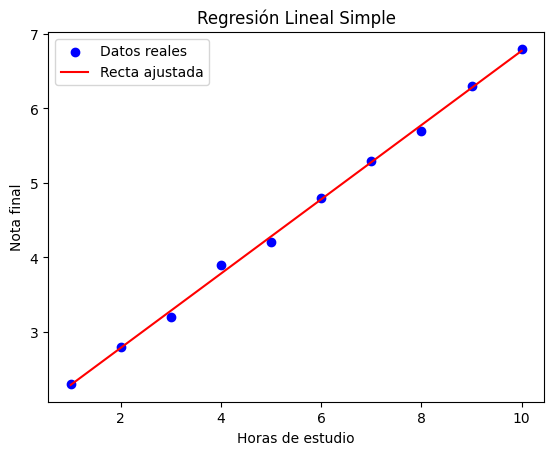

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Datos de ejemplo
X = np.array([1, 2, 3, 4, 5, 6, 7, 8, 9, 10]).reshape(-1, 1)
y = np.array([2.3, 2.8, 3.2, 3.9, 4.2, 4.8, 5.3, 5.7, 6.3, 6.8])

# Modelo lineal
model = LinearRegression()
model.fit(X, y)

y_pred = model.predict(X)

# Métricas
r2 = r2_score(y, y_pred)
mse = mean_squared_error(y, y_pred)

print(f"Ecuación: y = {model.intercept_:.2f} + {model.coef_[0]:.2f}x")
print(f"R²: {r2:.3f}, MSE: {mse:.3f}")

# Visualización
plt.scatter(X, y, color='blue', label='Datos reales')
plt.plot(X, y_pred, color='red', label='Recta ajustada')
plt.title('Regresión Lineal Simple')
plt.xlabel('Horas de estudio')
plt.ylabel('Nota final')
plt.legend()
plt.show()


R² (Polinómica grado 3): 0.998, MSE: 0.003


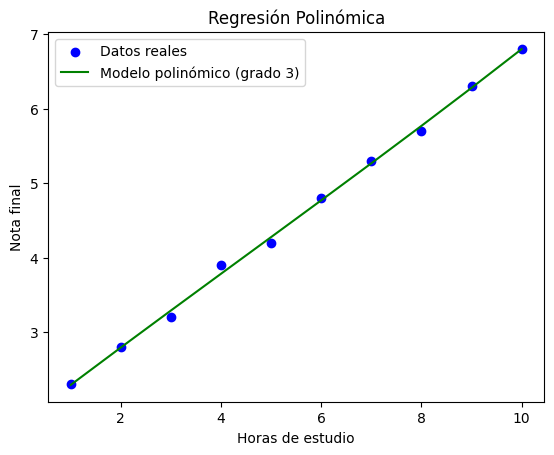

In [3]:
from sklearn.preprocessing import PolynomialFeatures

# Generar características polinómicas de grado 3
poly = PolynomialFeatures(degree=3)
X_poly = poly.fit_transform(X)

# Ajustar modelo polinómico
poly_model = LinearRegression()
poly_model.fit(X_poly, y)

y_poly_pred = poly_model.predict(X_poly)

# Métricas
r2_poly = r2_score(y, y_poly_pred)
mse_poly = mean_squared_error(y, y_poly_pred)

print(f"R² (Polinómica grado 3): {r2_poly:.3f}, MSE: {mse_poly:.3f}")

# Visualización
plt.scatter(X, y, color='blue', label='Datos reales')
plt.plot(X, y_poly_pred, color='green', label='Modelo polinómico (grado 3)')
plt.title('Regresión Polinómica')
plt.xlabel('Horas de estudio')
plt.ylabel('Nota final')
plt.legend()
plt.show()


--- Regresión Lineal con Datos Curvos ---
R²: 0.485, MSE: 2.489

--- Regresión Polinómica con Datos Curvos ---
R² (Polinómica grado 2): 0.799, MSE: 0.974


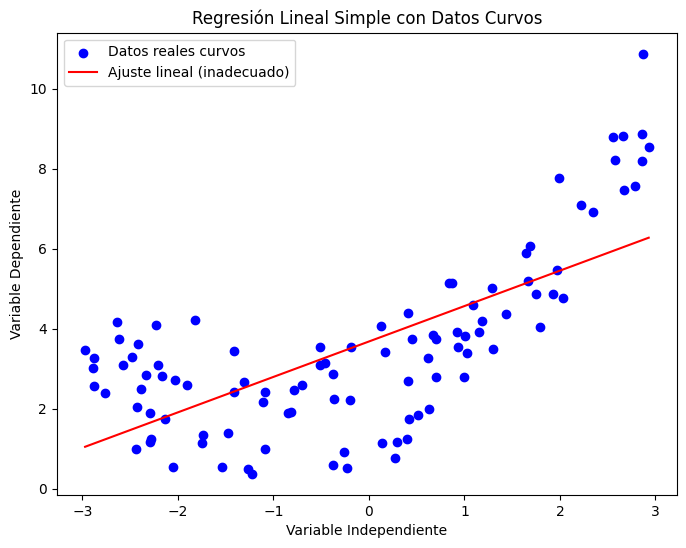

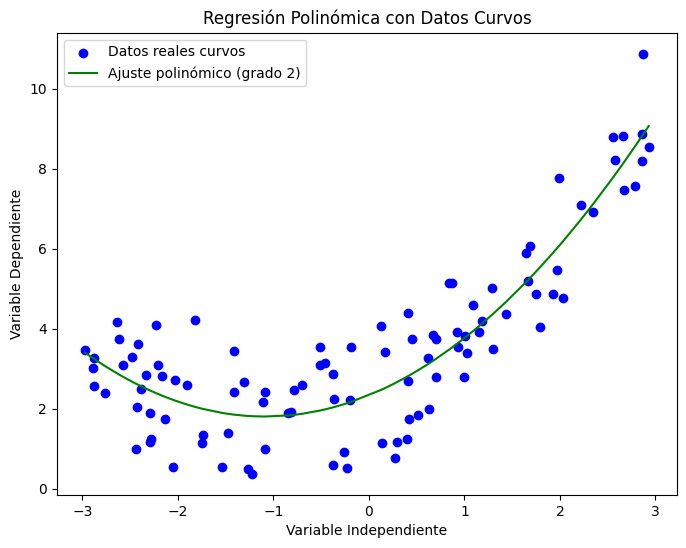

In [4]:
# 1. Generar nuevos datos con una tendencia curva más pronunciada (parábola)
np.random.seed(0)
X_curvo = 6 * np.random.rand(100, 1) - 3
y_curvo = 0.5 * X_curvo**2 + X_curvo + 2 + np.random.randn(100, 1)

# --- Modelo Lineal sobre datos curvos (para comparación) ---
print("--- Regresión Lineal con Datos Curvos ---")
linear_model_curvo = LinearRegression()
linear_model_curvo.fit(X_curvo, y_curvo)
y_linear_pred_curvo = linear_model_curvo.predict(X_curvo)

r2_linear_curvo = r2_score(y_curvo, y_linear_pred_curvo)
mse_linear_curvo = mean_squared_error(y_curvo, y_linear_pred_curvo)

print(f"R²: {r2_linear_curvo:.3f}, MSE: {mse_linear_curvo:.3f}\n")

# Visualización del modelo lineal
plt.figure(figsize=(8, 6))
plt.scatter(X_curvo, y_curvo, color='blue', label='Datos reales curvos')
# Ordenar los puntos para que la línea se dibuje correctamente
X_sorted, y_pred_sorted = zip(*sorted(zip(X_curvo, y_linear_pred_curvo)))
plt.plot(X_sorted, y_pred_sorted, color='red', label='Ajuste lineal (inadecuado)')
plt.title('Regresión Lineal Simple con Datos Curvos')
plt.xlabel('Variable Independiente')
plt.ylabel('Variable Dependiente')
plt.legend()
plt.savefig('linear_regression_curved_data_v2.png')
# plt.show()

# --- Modelo Polinómico sobre datos curvos ---
print("--- Regresión Polinómica con Datos Curvos ---")
poly_features = PolynomialFeatures(degree=2, include_bias=False)
X_poly_curvo = poly_features.fit_transform(X_curvo)

poly_model_curvo = LinearRegression()
poly_model_curvo.fit(X_poly_curvo, y_curvo)

# Predicciones sobre los datos originales transformados para las métricas
y_poly_pred_original = poly_model_curvo.predict(X_poly_curvo)
r2_poly_curvo = r2_score(y_curvo, y_poly_pred_original)
mse_poly_curvo = mean_squared_error(y_curvo, y_poly_pred_original)

print(f"R² (Polinómica grado 2): {r2_poly_curvo:.3f}, MSE: {mse_poly_curvo:.3f}")

# Visualización del modelo polinómico
plt.figure(figsize=(8, 6))
plt.scatter(X_curvo, y_curvo, color='blue', label='Datos reales curvos')
# Ordenar los puntos para que la línea se dibuje correctamente
X_sorted, y_poly_pred_sorted = zip(*sorted(zip(X_curvo, y_poly_pred_original)))
plt.plot(X_sorted, y_poly_pred_sorted, color='green', label='Ajuste polinómico (grado 2)')
plt.title('Regresión Polinómica con Datos Curvos')
plt.xlabel('Variable Independiente')
plt.ylabel('Variable Dependiente')
plt.legend()
plt.savefig('polynomial_regression_curved_data_v2.png')
# plt.show()